## SAVE OSI SAF SEA-ICE EXTENT

In [14]:
import numpy as np
import pylab as plt
import xarray as xr
import os,sys
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pyproj
import pandas as pd
import datetime
import glob
from scipy.stats import linregress

In [2]:
def get_sie(arr,threshold,grid_spacing):
    """arr: xarray arra, threshhold: threshold for SIE, typically 15%, grid_spacing: grid spacing in km"""

    # Define grid cell area if available (can also compute based on lat/lon, here assumed constant)
    # For simplicity, assume the grid cells are uniform and use a constant area (km² or m²).
    grid_cell_area = grid_spacing**2  # Example area for a grid cell in km² (adjust to actual values)
    
    # Apply the threshold to create a binary mask where sea ice concentration >= 15%
    ice_extent_mask = arr >= threshold
    
    # Multiply the binary mask by the grid cell area to get the ice-covered area
    ice_extent_area = ice_extent_mask * grid_cell_area*1e-6
    
    # Sum the area over the spatial dimensions (xc, yc) to get total extent for each time step
    sea_ice_extent_timeseries = ice_extent_area.sum(dim=['xc', 'yc'])
    return sea_ice_extent_timeseries

In [3]:
datadir= "/Users/vludwig/06_HAUSGARTEN/02_DATA/02_NETCDF/02_MONTHLY_OWN/"
savedir= "/Users/vludwig/06_HAUSGARTEN/02_DATA/01_CSV/"
plotdir = "/Users/vludwig/06_HAUSGARTEN/03_PLOTS/"

In [4]:
today = datetime.datetime.strftime(datetime.datetime.now(),"%Y%m%d")

In [5]:
# Define years and months
years = list(range(1987, 2025))
months = [f"{d:02d}" for d in range(1,13)]

In [8]:
df_out = pd.DataFrame({
    'year': np.repeat(years,len(months)),
    'month': months*len(years),
    'sie': len(months)*len(years)*np.nan,
    'sic': len(months)*len(years)*np.nan
    })

In [9]:

for year in years:
    for month in months:
        fns = list(np.sort([os.path.basename(fn) for fn in glob.glob(os.path.join(datadir,f"ice_conc_nh*{year}{month}nc"))]))
        # Create the DataFrame
        print(f"### {year} ###")
        print(f"Time: {datetime.datetime.strftime(datetime.datetime.now(),'%H:%M:%S')}")
        if year <=2020:
            prefix = "ice_conc_nh_ease2-250_cdr-v3p0_"
        else:
            prefix = "ice_conc_nh_ease2-250_icdr-v3p0_"
        fn = f"{prefix}{year}{month}.nc"
        print(fn)
        print("Loading data...")
        try:
            ds_month = xr.open_dataset(os.path.join(datadir,fn))
        except FileNotFoundError:
            print(f"{os.path.join(datadir,fn)} does not exist")
        print("Extracting station...")
        
        print("Getting SIE...")
        sie_month = get_sie(arr = ds_month.sea_ice_concentration, threshold=15, grid_spacing=25)
        print("Adding to dataframe...")
        df_out.loc[np.logical_and(df_out["year"] == year,df_out["month"] == month),"sie"] = np.round(sie_month.to_numpy(),3)
        df_out.loc[np.logical_and(df_out["year"] == year,df_out["month"] == month),"sic"] = np.round(ds_month.sea_ice_concentration.mean().to_numpy(),3)
        print(np.round(sie_month.to_numpy(),3))
        # sys.exit()
df_out.to_csv(os.path.join(savedir,f"sie_{today}.csv"),index = False)

### 1987 ###
Time: 15:07:11
ice_conc_nh_ease2-250_cdr-v3p0_198701.nc
Loading data...
Extracting station...
Getting SIE...
Adding to dataframe...
[15.588]
### 1987 ###
Time: 15:07:12
ice_conc_nh_ease2-250_cdr-v3p0_198702.nc
Loading data...
Extracting station...
Getting SIE...
Adding to dataframe...
[16.374]
### 1987 ###
Time: 15:07:12
ice_conc_nh_ease2-250_cdr-v3p0_198703.nc
Loading data...
Extracting station...
Getting SIE...
Adding to dataframe...
[16.126]
### 1987 ###
Time: 15:07:12
ice_conc_nh_ease2-250_cdr-v3p0_198704.nc
Loading data...
Extracting station...
Getting SIE...
Adding to dataframe...
[15.5]
### 1987 ###
Time: 15:07:12
ice_conc_nh_ease2-250_cdr-v3p0_198705.nc
Loading data...
Extracting station...
Getting SIE...
Adding to dataframe...
[13.912]
### 1987 ###
Time: 15:07:12
ice_conc_nh_ease2-250_cdr-v3p0_198706.nc
Loading data...
Extracting station...
Getting SIE...
Adding to dataframe...
[12.701]
### 1987 ###
Time: 15:07:12
ice_conc_nh_ease2-250_cdr-v3p0_198707.nc
Loading d

In [37]:
0.01*120

1.2

In [34]:
for month_int in range(1,13):
    print(month)
    if month_int <10:
        month = f"0{month_int}"
    else:
        month = f"{month_int}"
    df_month = df_out[df_out["month"]==month]
    print(f"{linregress(df_month['year'],df_month['sie'].to_numpy()).slope*10:0.03f}")
    

12
-0.418
01
-0.418
02
-0.367
03
-0.331
04
-0.250
05
-0.348
06
-0.567
07
-0.659
08
-0.827
09
-0.801
10
-0.658
11
-0.587


<Axes: >

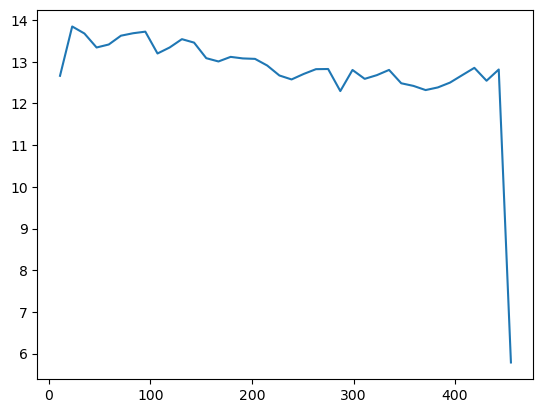

In [35]:
df_month['sie'].plot()